In [1]:
import os
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [2]:
file_name = '/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv'
df = pd.read_csv(file_name)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013/9/16,38.830002,38.990002,38.669998,38.830002,34.026104,440200
1,2013/9/17,38.490002,38.799999,38.360001,38.669998,33.885891,442700
2,2013/9/18,38.720001,39.860001,38.720001,39.799999,34.876091,742500
3,2013/9/19,39.770000,39.830002,39.529999,39.590000,34.692081,353300
4,2013/9/20,39.200001,39.340000,38.830002,38.900002,34.087433,877400
5,2013/9/23,39.029999,39.040001,38.700001,38.919998,34.104969,201000
6,2013/9/24,38.990002,39.240002,38.820000,38.959999,34.140015,224200
7,2013/9/25,38.869999,38.900002,38.549999,38.759998,34.135738,169800
8,2013/9/26,39.070000,39.270000,38.889999,39.189999,34.514431,196300
9,2013/9/27,38.689999,38.779999,38.599998,38.720001,34.100506,148300


In [3]:
def buy(cost,price):
    shares = cost / price
    return shares

def sell(cost,shares, price):
    revenue = shares * price
    profit = revenue - cost
    return profit

def compute_ma_df(df, win_st, win_lt):
    cost = 100
    shares = []
    profit = [] 
    try:
        new_df = df.copy()
        new_df.rename(columns={'Adj Close': 'Price'}, inplace = True)
        new_df = new_df[['Date', 'Price']]
        new_df['ma_st'] = new_df['Price'].rolling(win_st).mean()
        new_df['ma_lt'] = new_df['Price'].rolling(win_lt).mean()
        new_df = new_df.tail(len(new_df)-win_lt)
        new_df['buy'] = new_df['ma_st'] > new_df['ma_lt']
        new_df['sell'] = new_df['ma_st'] < new_df['ma_lt']
        new_df['transactions'] = np.where(new_df['buy'] != new_df['buy'].shift(+1),1,0)
        columnsTitles = ['Date','Price','ma_st','ma_lt','buy','sell','transactions']
        new_df.reindex(columns=columnsTitles)
        
        new_df = new_df.reset_index()
        
        for row in range(len(new_df)):
            if (new_df.loc[row]['buy'] == True) and (new_df.loc[row]['transactions'] ==1):
                shares.append(buy(cost,new_df.loc[row]['Price'])) 
            elif (new_df.loc[row]['buy'] == True) and (new_df.loc[row]['transactions'] ==0):
                shares.append(shares[len(shares)-1])
            else:
                shares.append(0)
        new_df['shares']= shares
        
        
        for row in range(len(new_df)):
            if (new_df.loc[row]['sell'] == True) and (new_df.loc[row]['transactions'] == 1):
                if row ==0:
                    profit.append(0)
                else:
                    profit.append(sell(cost,new_df.loc[row-1]['shares'],new_df.loc[row]['Price'])) 
            else:
               profit.append(0)
        new_df['profit']= profit

        return new_df
    except Exception as e:
        print(e)
        return None

In [4]:
# count the total number of transactions 
def count_trans(df):
    total_trans = sum(df['transactions'] ==1)/2
    return total_trans

# count the average profit of total transactions 
def count_PL(df):
    total_profit= sum(df['profit'])
    total_average_profit = total_profit/ count_trans(df)
    return total_average_profit
    

In [5]:
short_windows = []
long_windows = []
transactions = []
avg_profit = []
win_lost = []
size = []

for s_win in range(14, 50, 7):
    for i in range(1, 15):
        l_win = s_win + i * 7
        short_windows.append(s_win)
        long_windows.append(l_win)
        #print(s_win, l_win)
        df_ma = compute_ma_df(df,s_win,l_win)
        transactions.append(count_trans(df_ma))
        avg_profit.append(count_PL(df_ma))
        
        if count_PL(df_ma)>=0:
            win_lost.append('win')
        else:
            win_lost.append('lost')
            
        if abs(count_PL(df_ma)) >= 0 and abs(count_PL(df_ma))<0.25:
            size.append(1)
        elif abs(count_PL(df_ma)) >= 0.25 and abs(count_PL(df_ma))<0.5:
            size.append(2)
        elif abs(count_PL(df_ma)) >= 0.5 and abs(count_PL(df_ma))<0.75:
            size.append(3)
        elif abs(count_PL(df_ma)) >= 0.75 and  abs(count_PL(df_ma))<1:
            size.append(4)
        elif abs(count_PL(df_ma)) >= 1 and  abs(count_PL(df_ma))<1.25:
            size.append(5)
        elif abs(count_PL(df_ma)) >= 1.25 and  abs(count_PL(df_ma))<1.5:
            size.append(6)
        elif abs(count_PL(df_ma)) >= 1.5 and abs(count_PL(df_ma))<1.75:
            size.append(7)
        elif abs(count_PL(df_ma)) >= 1.75 and abs(count_PL(df_ma))<2:
            size.append(8)
        else:
            size.append(9)

d = {'s_win': short_windows, 'l_win': long_windows, '# of transactions' :transactions,'average P/L': avg_profit,'win/lost':win_lost,'size':size}
df_wins = pd.DataFrame(data=d)      
            
df_wins       


,s_win,l_win,# of transactions,average P/L,win/lost,size
0,14,21,39.5,0.141338,win,1
1,14,28,26.0,-0.190979,lost,1
2,14,35,18.0,0.620617,win,3
3,14,42,16.0,0.495741,win,2
4,14,49,14.0,0.923443,win,4
5,14,56,13.0,1.092965,win,5
6,14,63,12.0,1.577112,win,7
7,14,70,10.0,1.839728,win,8
8,14,77,10.0,0.608698,win,3
9,14,84,10.0,-0.237219,lost,1


In [6]:
sorted_df_wins = df_wins.sort_values(by=['average P/L'],ascending=False)

In [7]:
sorted_df_wins

,s_win,l_win,# of transactions,average P/L,win/lost,size
32,28,63,9.0,2.002187,win,9
31,28,56,9.5,1.888155,win,8
7,14,70,10.0,1.839728,win,8
6,14,63,12.0,1.577112,win,7
44,35,56,10.5,1.440622,win,6
39,28,112,5.5,1.432992,win,6
17,21,49,11.0,1.258207,win,6
37,28,98,7.5,1.122287,win,5
16,21,42,15.0,1.110273,win,5
5,14,56,13.0,1.092965,win,5


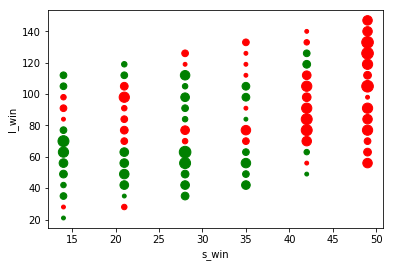

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

colors = np.where(df_wins['win/lost'] =='win' , 'g', 'r')
# plotting
df_wins.plot(kind='scatter', x='s_win', y='l_win',c=colors, s=df_wins['size']*15)
plt.show()

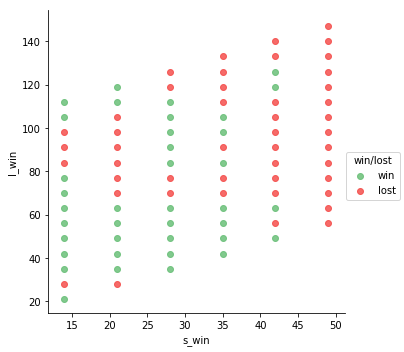

In [9]:
import seaborn as sns
sns.lmplot( x="s_win", y="l_win", data=df_wins, fit_reg=False, hue='win/lost', 
                 legend=True, palette=dict(win="#62bc71", lost="#f44542"))


From the above two graphs, I found that:
1) When the size of s_win is larger than 35, this moving average startegy is very likely to lose money. And the losing amount is much more than other combinations.
2) When the size of l_win is larger than 70, this moving average startegy is very likely to lose money
3) In conclusion, the best combination of s_win and l_win is: s_win < 35 and l_win < 70